In [2]:
from OASIS import OASIS
from dataset_loader import load_dataset
from utils import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import math
import os

In [ ]:
def nearest_indices_euclidean(anchor_image, dataset, num_indices=50):
    """
    Find the nearest indices to an anchor image using Euclidean distance.

    Parameters:
    anchor_image (list or ndarray): The anchor image vector.
    dataset (list of ndarray): The dataset of vectors.
    num_indices (int): The number of nearest indices to return.

    Returns:
    ndarray: Indices of the nearest vectors in the dataset.
    """

    distances = np.array(vectorized_euclidean_distances(anchor_image, np.array(dataset)))
    nearest_indices = np.argsort(distances)[:num_indices]

    # Get the distances for these nearest indices
    nearest_distances = distances[nearest_indices]


    return nearest_indices, nearest_distances


def nearest_indices_mahalanobis(anchor_image, dataset, start_matrix, num_indices=50):
    """
    Find the nearest indices to an anchor image using Mahalanobis distance.

    Parameters:
    anchor_image (list or ndarray): The anchor image vector.
    dataset (list of ndarray): The dataset of vectors.
    start_matrix (ndarray): The metric matrix used to calculate Mahalanobis distance.
    num_indices (int): The number of nearest indices to return.

    Returns:
    ndarray: Indices of the nearest vectors in the dataset.
    """
    distances = np.array(vectorized_mahalanobis_distances(anchor_image, np.array(dataset), start_matrix))
    nearest_indices = np.argsort(distances)[:num_indices]

    # Get the distances for these nearest indices
    nearest_distances = distances[nearest_indices]

    return nearest_indices, nearest_distances

In [3]:
def plot_images(image_path, image_names, nearest_indices, nearest_distances, images_per_row=5):
    """
    Function to plot images in a grid layout and highlight changed indices.

    Args:
    - image_path (str): Path to the folder containing images.
    - image_names (list): List of image filenames.
    - nearest_indices (list): List of indices for the images to display.
    - nearest_distances (list): List of distances corresponding to the nearest images.
    - changed_indices (set): Set of indices that should be highlighted (default: None).
    - images_per_row (int): Number of images to display in each row (default: 10).

    Returns:
    - Displays the images in a grid with the distances as titles and highlights changed indices.
    """
    
    # Calculate the number of rows needed
    num_rows = math.ceil(len(nearest_indices[:20]) / images_per_row)
    
    # Create a figure with subplots for each image
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 2.5 * num_rows))
    
    # Flatten the axes array to easily access each subplot
    axs = axs.flatten()

    # Loop through each image index and display the image
    for i, idx in enumerate(nearest_indices[:20]):
        img_name = image_names[idx]
        img = mpimg.imread(image_path + img_name)
        
        # Display the image and set the title to include the index and the distance
        axs[i].imshow(img)
        axs[i].set_title(f"{idx} [{nearest_distances[i]:.5f}]", fontsize=15)
        axs[i].axis('off')  # Hide the axis for a cleaner look


    plt.tight_layout()
    plt.show()
    
def plot_images_with_changes(image_path, image_names, nearest_indices, nearest_distances, distance_differences, images_per_row=5):
    """
    Function to plot images in a grid layout and color titles based on distance changes.

    Args:
    - image_path (str): Path to the folder containing images.
    - image_names (list): List of image filenames.
    - nearest_indices (list): List of indices for the images to display.
    - nearest_distances (list): List of distances corresponding to the nearest images.
    - distance_differences (list): List of differences between Mahalanobis and Euclidean distances.
    - images_per_row (int): Number of images to display in each row (default: 10).

    Returns:
    - Displays the images in a grid with the distances as titles, color-coded for changes.
    """
    
    # Calculate the number of rows needed
    num_rows = math.ceil(len(nearest_indices[:20]) / images_per_row)
    
    # Create a figure with subplots for each image
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 2.5 * num_rows))
    
    # Flatten the axes array to easily access each subplot
    axs = axs.flatten()

    # Loop through each image index and display the image
    for i, idx in enumerate(nearest_indices[:20]):
        img_name = image_names[idx]
        img = mpimg.imread(image_path + img_name)
        
        # Display the image
        axs[i].imshow(img)
        axs[i].axis('off')  # Hide the axis for a cleaner look

        # Determine title color based on distance difference
        if distance_differences[i] > 0:
            title_color = 'red'  # Distance increased
        elif distance_differences[i] < 0:
            title_color = 'green'  # Distance decreased
        else:
            title_color = 'black'  # No change

        # Set the title to include the index, distance, and color-code it
        axs[i].set_title(f"{idx} [{nearest_distances[i]:.5f}]", color=title_color, fontsize=15)

    plt.tight_layout()
    plt.show()

In [4]:
# Specify the directory you want to read from
directory = os.path.join(os.path.dirname(os.getcwd()), 'ViT-L14')

# size = 252001
files_set = [
    '003.txt', '004.txt', '005.txt', 
    '006.txt', '007.txt', '048.txt',
    '049.txt', '055.txt', '056.txt',
    '057.txt'
]

In [5]:
image_path = os.path.join(os.path.dirname(os.getcwd()), 'images/')

In [6]:
image_names, dataset = load_dataset(directory, files_set)

Processing file: 003.txt
	Number of vectors: 5516
Processing file: 004.txt
	Number of vectors: 8386
Processing file: 005.txt
	Number of vectors: 13638
Processing file: 006.txt
	Number of vectors: 17044
Processing file: 007.txt
	Number of vectors: 15181
Processing file: 048.txt
	Number of vectors: 26687
Processing file: 049.txt
	Number of vectors: 44032
Processing file: 055.txt
	Number of vectors: 43070
Processing file: 056.txt
	Number of vectors: 39764
Processing file: 057.txt
	Number of vectors: 38683

Number of vectors in all files: 252001
Number of dimensions: 768


In [7]:
dataset = np.array(dataset)

We assume a new user scenario where the initial matrix is an identity matrix

For faster computation we can use Euclidean distance because we know that
Mahalanobis distance with identity matrix is equal to Euclidean distance.

In [8]:
random_image = dataset[5294]
nearest_euclidean_indices, nearest_euclidean_distances = nearest_indices_euclidean(random_image, dataset, num_indices=25)
print(nearest_euclidean_indices)

[  5294 239100  36111 249480 242786 228904  13752  27430  38617  16738
 233706 219917  54812 214245 234732  14111 217372 225723 163243   4603
 246903   1726   7121  13095 114439]


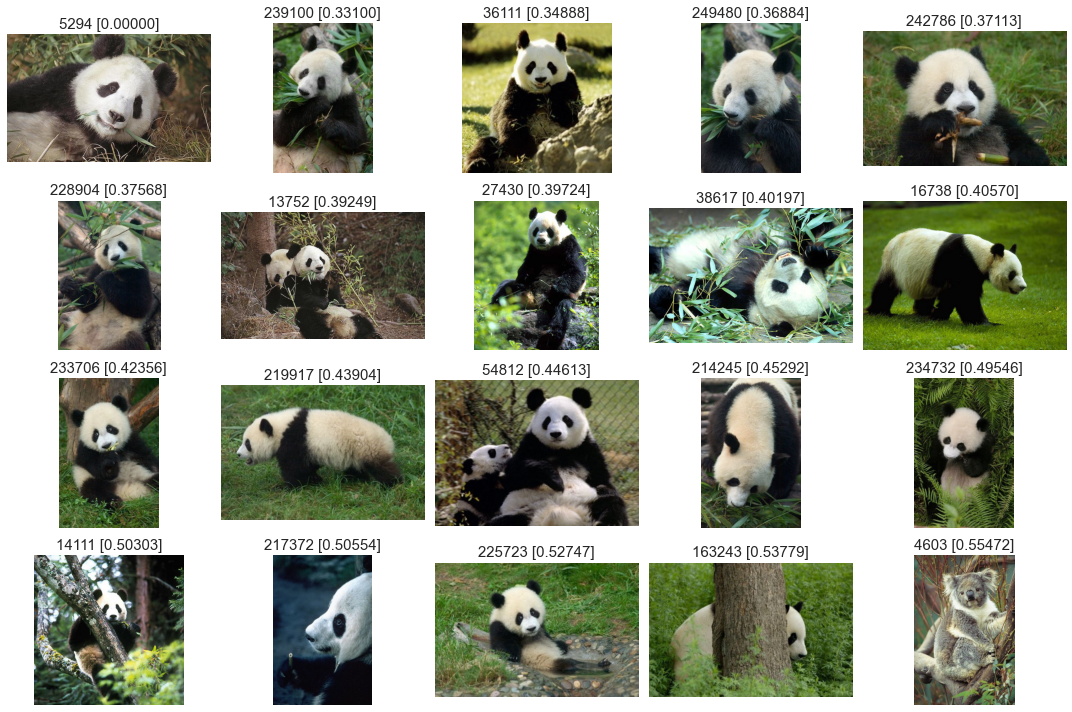

In [9]:
plot_images(image_path, image_names, nearest_euclidean_indices, nearest_euclidean_distances)

As we can see in each image is panda expect for the last one where is koala

So we will use this koala with index 4603 as dissimilar image and for similar we will select index 249480

In [10]:
triplets = []
triplets.append([dataset[5294], dataset[242786], dataset[4603]])

In [11]:
M = np.eye(len(dataset[0]))

In [12]:
oasis_model = OASIS(tau=0.07, enforce_symmetric=True, enforce_psd=True, verbose=True)

oasis_model.partial_fit(M, triplets)

M = oasis_model.get_matrix()

print(f"Scaling factor of M: {calculate_scaling_factor(M)}")

Matrix is PSD.
Scaling Factor of M: (1.0083621525175357+0j)
Scaling factor of M: (1.0083621525175357+0j)


In [13]:
nearest_mahalanobis_indices, nearest_mahalanobis_distances = nearest_indices_mahalanobis(random_image, dataset, M, num_indices=25)
print(nearest_mahalanobis_indices)

[  5294 239100  36111 249480 242786 228904  13752  27430  38617  16738
 233706 219917  54812 214245 234732  14111 217372 225723 163243 246903
   4603   1726   7121  13095 114439]


In [14]:
# Create dataframes for easy alignment
euclidean_df = pd.DataFrame({
    'Index': nearest_euclidean_indices,
    'Euclidean Distance': nearest_euclidean_distances
})

mahalanobis_df = pd.DataFrame({
    'Index': nearest_mahalanobis_indices,
    'Mahalanobis Distance': nearest_mahalanobis_distances
})

# Merge the two dataframes on the 'Index' column
comparison_df = pd.merge(euclidean_df, mahalanobis_df, on='Index', how='inner')

# Calculate the difference in distances
comparison_df['Distance Difference'] = comparison_df['Mahalanobis Distance'] - comparison_df['Euclidean Distance']

comparison_df

,Index,Euclidean Distance,Mahalanobis Distance,Distance Difference
0,5294,0.000000,0.000000,0.000000e+00
1,239100,0.331004,0.330838,-1.661205e-04
2,36111,0.348882,0.348892,1.017390e-05
3,249480,0.368842,0.368601,-2.408953e-04
4,242786,0.371132,0.370677,-4.547893e-04
5,228904,0.375680,0.375643,-3.760356e-05
6,13752,0.392495,0.392592,9.752481e-05
7,27430,0.397241,0.397440,1.988898e-04
8,38617,0.401973,0.401953,-2.070752e-05
9,16738,0.405696,0.405763,6.717243e-05


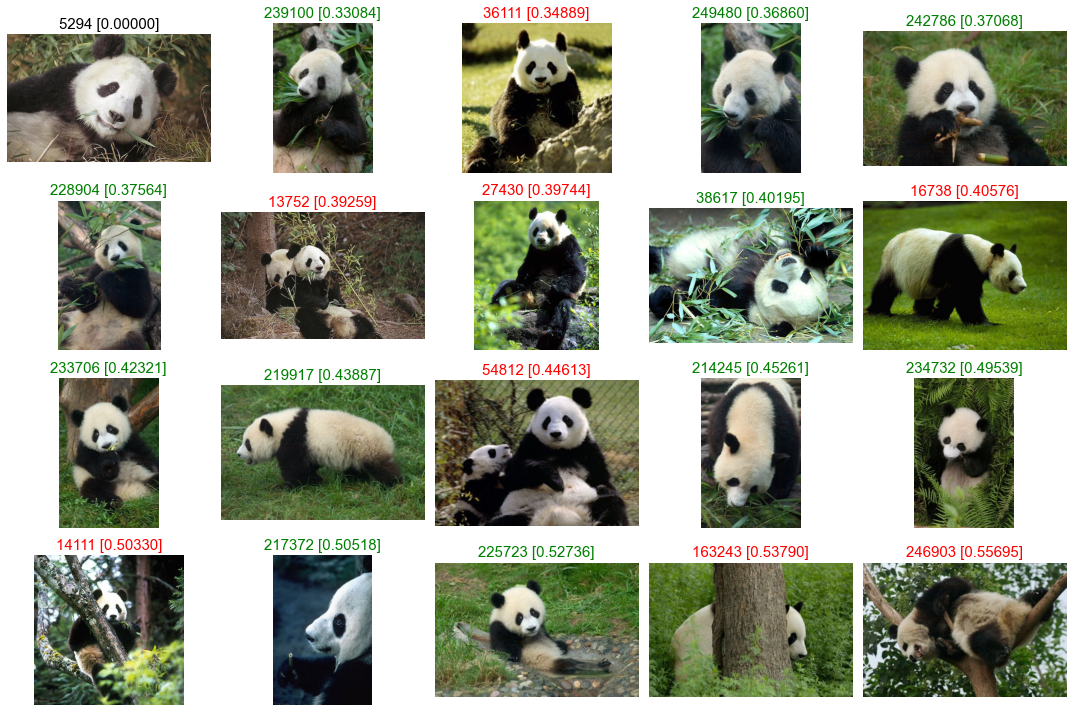

In [15]:
plot_images_with_changes(
    image_path=image_path,
    image_names=image_names,
    nearest_indices=nearest_mahalanobis_indices,
    nearest_distances=nearest_mahalanobis_distances,
    distance_differences=comparison_df['Distance Difference']
)